# Phân tích dữ liệu khám phá (EDA) - Dữ liệu Bán lẻ Online

Đây là quá trình phân tích tập dữ liệu bán lẻ online để khám phá các thông tin chi tiết quan trọng, xác định các mẫu, phát hiện sự bất thường và kiểm tra các giả định thông qua các phương pháp thống kê và trực quan hóa dữ liệu.

## 1. Tải và kiểm tra dữ liệu

Đầu tiên, chúng ta sẽ tải dữ liệu từ tệp `.csv` (được chuyển đổi từ `.xlsx`) vào một DataFrame của `pandas` và xem qua một vài dòng đầu tiên để hiểu cấu trúc của nó.

In [2]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập style cho biểu đồ
sns.set(style="whitegrid")

# Tải dữ liệu từ file excel
file_path = 'Online Retail.xlsx'
df = pd.read_excel(file_path)

# Hiển thị 5 dòng đầu tiên của dữ liệu
print("5 dòng dữ liệu đầu tiên:")
df.head()

5 dòng dữ liệu đầu tiên:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 2. Tìm hiểu dữ liệu tổng quan

Ở bước này, chúng ta sẽ kiểm tra:
- **Kích thước của DataFrame:** Bao nhiêu hàng và cột?
- **Thông tin các cột:** Tên cột, số lượng giá trị không rỗng và kiểu dữ liệu của chúng.
- **Tóm tắt thống kê:** Các giá trị thống kê cơ bản cho các cột số như trung bình, độ lệch chuẩn, min, max.

In [3]:
# Lấy kích thước của DataFrame (số hàng, số cột)
print(f"Kích thước của dữ liệu: {df.shape[0]} hàng và {df.shape[1]} cột\n")

# Xem thông tin chi tiết về các cột, kiểu dữ liệu và giá trị non-null
print("Thông tin chi tiết về các cột:")
df.info()

# Xem tóm tắt thống kê cho các cột số
print("\nTóm tắt thống kê cho các cột số:")
df.describe()

Kích thước của dữ liệu: 541909 hàng và 8 cột

Thông tin chi tiết về các cột:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB

Tóm tắt thống kê cho các cột số:


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


## 3. Làm sạch dữ liệu (Data Cleaning)

Dữ liệu trong thế giới thực thường lộn xộn. Chúng ta cần xử lý các vấn đề sau:
- **Giá trị bị thiếu (Missing Values):** Kiểm tra xem cột nào có giá trị null và quyết định cách xử lý (xóa hoặc điền giá trị).
- **Dữ liệu trùng lặp (Duplicate Records):** Tìm và loại bỏ các hàng bị trùng lặp hoàn toàn.
- **Chuyển đổi kiểu dữ liệu:** Đảm bảo các cột có kiểu dữ liệu phù hợp (ví dụ: chuyển cột ngày tháng sang kiểu datetime).
- **Xử lý các giá trị không hợp lệ:** Ví dụ, `Quantity` và `UnitPrice` không thể có giá trị âm.

In [4]:
# 1. Kiểm tra giá trị bị thiếu
print("Số lượng giá trị bị thiếu trong mỗi cột:")
print(df.isnull().sum())

# Xử lý giá trị bị thiếu: CustomerID rất quan trọng, nếu thiếu thì khó phân tích.
# Vì vậy, ta sẽ xóa các hàng thiếu CustomerID.
df.dropna(subset=['CustomerID'], inplace=True)

# 2. Kiểm tra và xóa dữ liệu trùng lặp
print(f"\nSố lượng hàng trùng lặp: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

# 3. Chuyển đổi kiểu dữ liệu cho InvoiceDate
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 4. Xử lý các giá trị không hợp lệ
# Loại bỏ các giao dịch bị hủy (InvoiceNo bắt đầu bằng 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
# Loại bỏ các hàng có Quantity <= 0
df = df[df['Quantity'] > 0]
# Loại bỏ các hàng có UnitPrice <= 0
df = df[df['UnitPrice'] > 0]


# Kiểm tra lại kích thước và thông tin dữ liệu sau khi làm sạch
print("\nThông tin dữ liệu sau khi làm sạch:")
df.info()

Số lượng giá trị bị thiếu trong mỗi cột:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Số lượng hàng trùng lặp: 5225

Thông tin dữ liệu sau khi làm sạch:
<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


## 4. Thêm thuộc tính mới (Feature Engineering)

Để phân tích sâu hơn, chúng ta có thể tạo ra các cột mới từ dữ liệu hiện có.
- **TotalPrice:** Tổng giá trị của mỗi giao dịch (`Quantity` * `UnitPrice`).
- **Year, Month, Day, Hour:** Trích xuất các thành phần thời gian từ `InvoiceDate` để phân tích xu hướng theo thời gian.

In [5]:
# Tạo cột TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Trích xuất thông tin thời gian
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.dayofweek # 0: Thứ 2, 6: Chủ Nhật
df['Hour'] = df['InvoiceDate'].dt.hour

print("Dữ liệu sau khi thêm các cột mới:")
df.head()

Dữ liệu sau khi thêm các cột mới:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,8


## 5. Trực quan hóa và Phân tích

Bây giờ, chúng ta sẽ khám phá dữ liệu thông qua các biểu đồ để trả lời các câu hỏi kinh doanh.

### Câu hỏi 1: Những quốc gia nào có số lượng đơn hàng cao nhất?

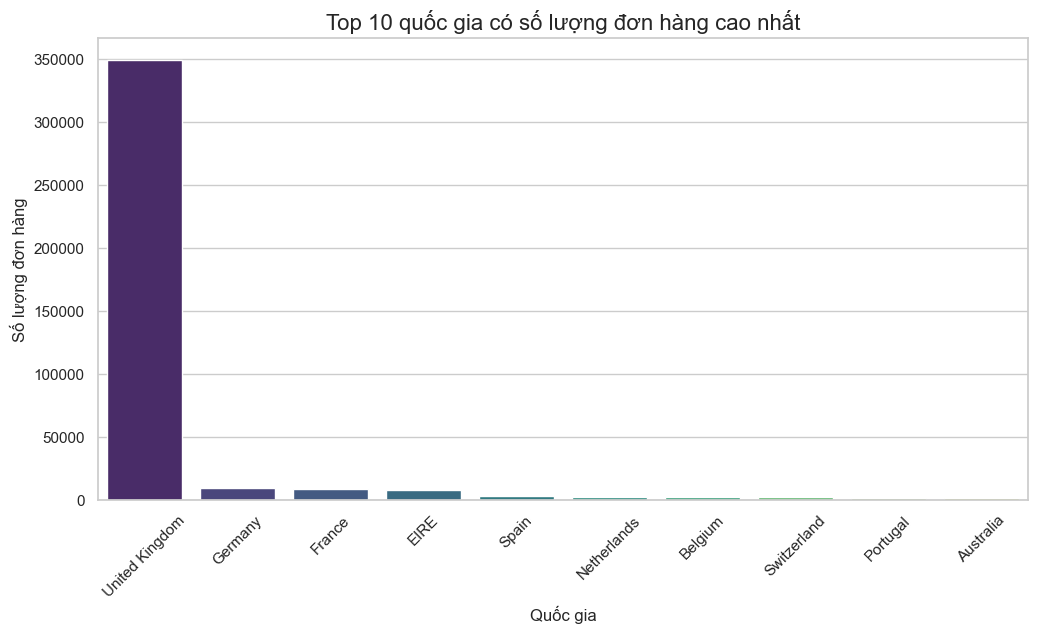

In [7]:
# Tính số lượng đơn hàng theo quốc gia
country_counts = df['Country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis', hue = country_counts.index, legend = False)
plt.title('Top 10 quốc gia có số lượng đơn hàng cao nhất', fontsize=16)
plt.xlabel('Quốc gia', fontsize=12)
plt.ylabel('Số lượng đơn hàng', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Câu hỏi 2: Doanh thu thay đổi như thế nào theo thời gian (hàng tháng)?

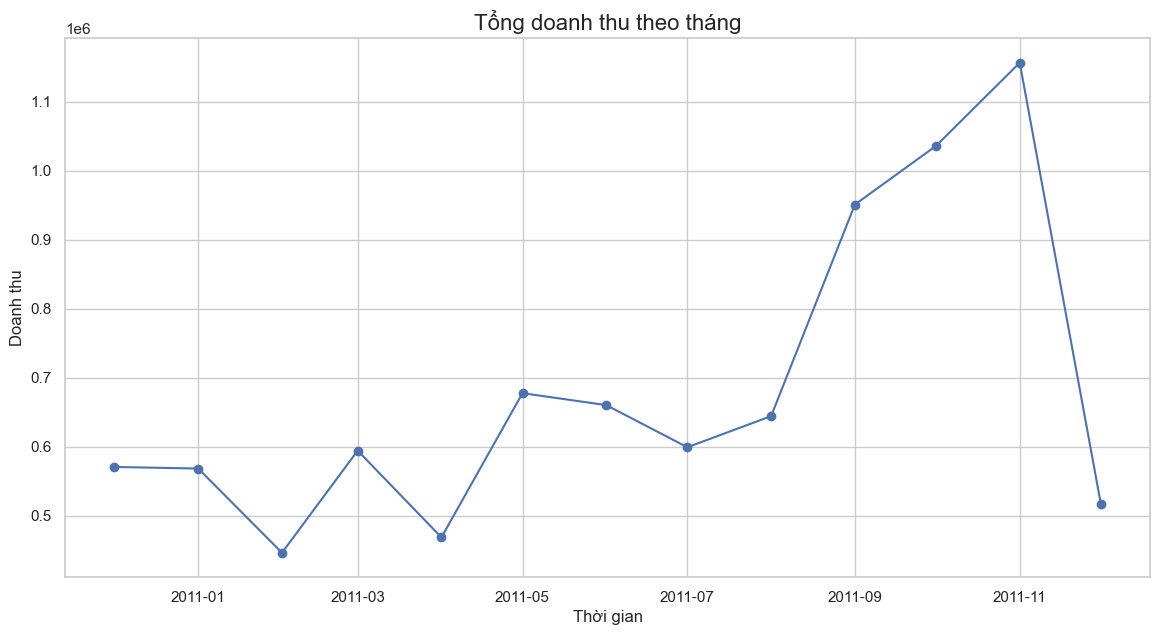

In [9]:
# Nhóm dữ liệu theo tháng và năm để tính tổng doanh thu
monthly_revenue = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum()
monthly_revenue.index = monthly_revenue.index.to_timestamp()

plt.figure(figsize=(14, 7))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-')
plt.title('Tổng doanh thu theo tháng', fontsize=16)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)
plt.grid(True)
plt.show()

### Câu hỏi 3: Những sản phẩm nào được bán chạy nhất?

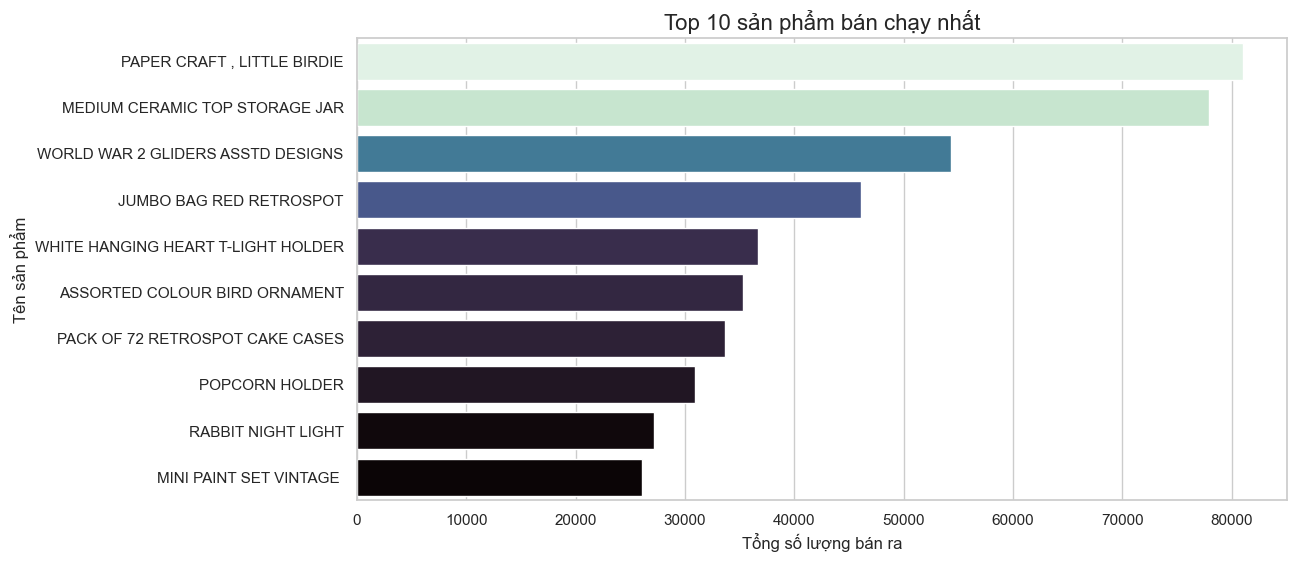

In [11]:
# Top 10 sản phẩm bán chạy nhất theo số lượng
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='mako', hue = top_products.values, legend = False)
plt.title('Top 10 sản phẩm bán chạy nhất', fontsize=16)
plt.xlabel('Tổng số lượng bán ra', fontsize=12)
plt.ylabel('Tên sản phẩm', fontsize=12)
plt.show()

## 6. Tổng kết

Qua quá trình EDA, chúng ta đã:
1.  **Làm sạch và chuẩn bị dữ liệu:** Xử lý các giá trị thiếu, trùng lặp và không hợp lệ.
2.  **Khám phá dữ liệu:** Hiểu được cấu trúc, các đặc điểm thống kê cơ bản.
3.  **Rút ra insights:**
    - **Vương quốc Anh (United Kingdom)** là thị trường lớn nhất, chiếm phần lớn các đơn hàng.
    - Doanh thu có xu hướng **tăng mạnh vào cuối năm**, đặc biệt là tháng 11, có thể do mùa mua sắm cuối năm.
    - Các sản phẩm phổ biến là các mặt hàng trang trí nhỏ, quà tặng.